# Project: Fuel Economy Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Every year, the Environmental Protection Agency (EPA) provides fuel economy data to the Government, and it gets published in the [annual Fuel Economy Guide](https://www.fueleconomy.gov/)
This report explores and analyzes fuel economy data (retrieved from the [Fuel Economy website](https://www.fueleconomy.gov/feg/download.shtml/)) for different car models in 2008 and 2018 to answer the below questions:
1.	Are more unique models using alternative sources of fuel? By how much?
2.	How much have vehicle classes improved in fuel economy?
3.	What are the characteristics of SmartWay vehicles? Have they changed over time?
4.	What features are associated with better fuel economy?

<a id='wrangling'></a>
## Data Wrangling
The first step is to import all necessary libraries and load the two dataframes from EPA website. Then, I take a peek at a couple first rows of both 2008 and 2018 dataframes and exploring the data.

In [889]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

df_08 = pd.read_csv('all_alpha_08.csv')
df_18 = pd.read_csv('all_alpha_18.csv')

In [890]:
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [891]:
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.08H3,small SUV,3,26,27,27,6,No,330
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV03.08H3,small SUV,3,26,27,27,6,No,330
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.5RH3,small SUV,3,19,27,22,4,No,404


### Investigate and clean the content of 2008 and 2018 dataframes
This step is done by answering the below questions:

#### How many samples of 2008 dataframe are there? - Is there any missing value?
There are 2404 samples and there are some missing values in columns: Cyl, Trans, Drive, FE Cald Appr, City PMG, Hwy MPG, Cmb MPG, Unadj Cmb MPG, Greenhouse Gas Score

In [892]:
# Identify columns with missing values in dataset 2008
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
Model                   2404 non-null object
Displ                   2404 non-null float64
Cyl                     2205 non-null object
Trans                   2205 non-null object
Drive                   2311 non-null object
Fuel                    2404 non-null object
Sales Area              2404 non-null object
Stnd                    2404 non-null object
Underhood ID            2404 non-null object
Veh Class               2404 non-null object
Air Pollution Score     2404 non-null object
FE Calc Appr            2205 non-null object
City MPG                2205 non-null object
Hwy MPG                 2205 non-null object
Cmb MPG                 2205 non-null object
Unadj Cmb MPG           2205 non-null float64
Greenhouse Gas Score    2205 non-null object
SmartWay                2404 non-null object
dtypes: float64(2), object(16)
memory usage: 338.1+ KB


In [893]:
# view missing value count for each feature in 2008
df_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

Since the numbers of null values for these columns are relatively small (less than 200) compared to the total samples (2404) of 2008 dataframes, I'm going to drop all these null values

In [894]:
# drop rows with any null values in 2008 dataframe
df_08.dropna(inplace=True)

In [895]:
# Check if any column of 2008 dataframe has null value - Should print False
df_08.isnull().sum().any()

False

#### How many samples of 2018 dataframe are there? - Is there any missing value?
There are 2682 samples, and there are some missing values in two columns: Displ, Cyl.

In [896]:
# Identify columns with missing values in dataset 2018
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682 entries, 0 to 2681
Data columns (total 18 columns):
Model                   2682 non-null object
Displ                   2637 non-null float64
Cyl                     2637 non-null float64
Trans                   2682 non-null object
Drive                   2682 non-null object
Fuel                    2682 non-null object
Cert Region             2682 non-null object
Stnd                    2682 non-null object
Stnd Description        2682 non-null object
Underhood ID            2682 non-null object
Veh Class               2682 non-null object
Air Pollution Score     2682 non-null int64
City MPG                2682 non-null object
Hwy MPG                 2682 non-null object
Cmb MPG                 2682 non-null object
Greenhouse Gas Score    2682 non-null int64
SmartWay                2682 non-null object
Comb CO2                2682 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 377.2+ KB


In [897]:
# view missing value count for each feature in 2018
df_18.isnull().sum()

Model                    0
Displ                   45
Cyl                     45
Trans                    0
Drive                    0
Fuel                     0
Cert Region              0
Stnd                     0
Stnd Description         0
Underhood ID             0
Veh Class                0
Air Pollution Score      0
City MPG                 0
Hwy MPG                  0
Cmb MPG                  0
Greenhouse Gas Score     0
SmartWay                 0
Comb CO2                 0
dtype: int64

Since the numbers of null values for these columns are relatively small (45) compared to the total samples (2682) of 2018 dataframes, I'm going to drop all these null values

In [898]:
# drop rows with any null values in 2018 dataframe
df_18.dropna(inplace=True)

In [899]:
# Check if any column of 2018 dataframe has null value - Should print False
df_18.isnull().sum().any()

False

#### How many duplicates are in both dataframes?

In [900]:
sum(df_08.duplicated()), sum(df_18.duplicated())

(6, 0)

In [901]:
# Drop duplicates in 2008 dataframe
df_08.drop_duplicates(inplace=True)

In [902]:
# Check to confirm there are no more duplicates in dataframes
sum(df_08.duplicated()), sum(df_18.duplicated())

(0, 0)

#### How many unique values  are in the 2008 dataframe?

In [903]:
# Identiy unique values for each dataset
df_08.nunique()

Model                   411
Displ                    46
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     10
Underhood ID            323
Veh Class                 8
Air Pollution Score      11
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

#### How many unique values are in the 2018 dataframe?

In [904]:
df_18.nunique()

Model                   625
Displ                    45
Cyl                       9
Trans                    29
Drive                     2
Fuel                      4
Cert Region               2
Stnd                     22
Stnd Description         22
Underhood ID            399
Veh Class                10
Air Pollution Score       6
City MPG                 92
Hwy MPG                  99
Cmb MPG                  91
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                404
dtype: int64

#### Drop unnecessary columns
Since there are some unnecessary columns that are unrelated to my analysis, I am going to drop them from both 2008 and 2018 dataframes

In [905]:
# drop columns from 2008 dataset
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [906]:
# drop columns from 2018 dataset
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'],axis=1,inplace =True)


# confirm changes
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,25,35,29,6,No


After a brief observation, I see that all column labels for both 2008 and 2018 dataframes match except for column 7th. I am going to relabel that column header of 2008 dataframe to match with the one in 2018 dataframe.

In [907]:
# rename Sales Area to Cert Region
df_08.rename(columns={'Sales Area':'Cert Region'}, inplace = True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [908]:
# Check to see how many columns there are in each dataframe
df_08.shape[1], df_18.shape[1]

(14, 14)

#### Format column labels
We see that both dataframes share the same number of columns and have the same column labels, which makes it easier to do analytic comparison later on. However, there are whitespaces in some columns labels that have more than one words ("Cert Region"), which makes it very tricky when indexing since a whitespace is a character in Python. Replacing the whitespaces with underscores seems like an optimal solution for this.

In [909]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [910]:
# replace spaces with underscores and lowercase labels for 2018 dataset
df_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace = True)

# confirm changes
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,25,35,29,6,No


In [911]:
# confirm column labels for 2008 and 2018 datasets are identical
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [912]:
# make sure they're all identical like this
(df_08.columns == df_18.columns).all()

True

In [913]:
# save new datasets
df_08.to_csv('data_08.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

In [914]:
# load new datasets
import pandas as pd
df_08 = pd.read_csv('data_08.csv')
df_18 = pd.read_csv('data_18.csv')

In [915]:
#View number of columns each dataframe has
df_08.shape[1],df_18.shape[1]

(14, 14)

For consistency, I only compare cars certfied by California standards. I filter both dataframes to select rows where the "cert_region" is "CA". I then drop this "cert_region" column since it's no longer needed. 

In [916]:
# filter datasets for rows following California standards
df_08 = df_08.query('cert_region == "CA"')
df_18 = df_18.query('cert_region == "CA"')

In [917]:
# confirm only certification region is California
df_08['cert_region'].unique()

array(['CA'], dtype=object)

In [918]:
# confirm only certification region is California
df_18['cert_region'].unique()

array(['CA'], dtype=object)

In [919]:
# drop certification region columns form both datasets
df_08.drop(['cert_region'], axis = 1, inplace=True)
df_18.drop(['cert_region'], axis = 1, inplace=True)

In [920]:
# Confirm 'cert_region' column is dropped in both dataframes
df_08.shape[1],df_18.shape[1]

(13, 13)

## Dedupe Data

In [921]:
# print number of duplicates in 2008 and 2018 datasets
print(sum(df_08.duplicated()))
print(sum(df_18.duplicated()))

20
10


In [922]:
# drop duplicates in both datasets
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [923]:
print(sum(df_08.duplicated()))
print(sum(df_18.duplicated()))

0
0


#### Fixing `cyl` Data Type
It looks like there is some inconsistency in the data type of colum 'cyl' in both dataframes.
In 2008 dataframe, 'cyl' data type is string whilst data type of 'cyl' in 2018 dataframe is float. 
My solution: 
- 2008 dataframe: extract int from string
- 2018 dataframe: convert float to int

In [924]:
# Check data type of column 'cyl' in 2008 dataframe before conversion - 'O' stands for Object type
df_08.dtypes['cyl']

dtype('O')

In [925]:
# check value counts for the 2008 cyl column
df_08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [926]:
# Extract int from strings in the 2008 cyl column
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)

In [927]:
# Check value counts for 2008 cyl column again to confirm the change
df_08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [928]:
# Check data type of column 'cyl' in 2018 dataframe before conversion
df_18.dtypes['cyl']

dtype('float64')

In [929]:
# convert 2018 cyl column to int
df_18['cyl'] = df_18['cyl'].astype(int)

In [930]:
# Check to make sure datatype for cyl in 2018 is changed to int
df_18['cyl'].dtype

dtype('int64')

#### Fixing `air_pollution_score` Data Type
Per my observation, another data type inconsistency is found on column 'air_pollution_score'. Its data type is string in 2008 and int in 2018. For scores, it makes sense to convert to float data type. My intial solution is:
- For 2008: convert string to float
- For 2018: convert int to float

In [931]:
# Check data type of columns 'air_pollution_score' in both dataframes
df_08.dtypes['air_pollution_score'],df_18.dtypes['air_pollution_score']

(dtype('O'), dtype('int64'))

In [932]:
# Convert 'air_pollution_score' column of 2008 data frame
df_08['air_pollution_score'] = df_08['air_pollution_score'].astype(float)

ValueError: could not convert string to float: '6/4'

#### Figuring out the issue
Looks like this isn't going to be as simple as converting the datatype. According to the error above, the value at row 582 is "6/4" - let's check it out.

In [933]:
df_08.iloc[582]

model                   MERCEDES-BENZ C300
displ                                    3
cyl                                      6
trans                              Auto-L7
drive                                  2WD
fuel                           ethanol/gas
veh_class                        small car
air_pollution_score                    6/4
city_mpg                             13/18
hwy_mpg                              19/25
cmb_mpg                              15/21
greenhouse_gas_score                   7/6
smartway                                no
Name: 1349, dtype: object

It turns out that not just the 'air_polution_score' but 'fuel','city_mpg','hwy_mpg','cmb_mpg','greenhouse_gas_score' share the same problem: they all contain '/'- maybe that's why these were all saved as strings.

According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which is found from the PDF documentation:

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
So all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each.
The solution now is to seperate all hybrids into two rows for each, then combine them in each dataframe.

In [934]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1349,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [935]:
# Then comes to all hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
57,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Gasoline/Electricity,small car,7,34/81,39/86,36/83,10,Elite
173,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
225,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
227,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
257,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
342,BMW X5 xDrive40e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,standard SUV,3,23/55,25/57,24/56,8,Yes
353,BMW i3 (94Ah),0.6,2,Auto-1,2WD,Gasoline/Electricity,small car,7,36/117,33/101,35/109,10,Elite
355,BMW i3s (94Ah),0.6,2,Auto-1,2WD,Gasoline/Electricity,small car,7,36/117,33/101,35/109,10,Elite
411,CADILLAC CT6 Plug-In,2.0,4,CVT,2WD,Gasoline/Electricity,midsize car,3,23/56,29/71,25/62,10,Yes
523,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No


In [936]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1349,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


#### Split values for `fuel`, `air_pollution_score` ,`city_mpg`, `hwy_mpg`, `cmb_mpg`, `greenhouse_gas_score`

In [937]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [938]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1349,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [939]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1349,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1349,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [940]:
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)

In [941]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [942]:
df_08.shape
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no


#### Repeat this process for the 2018 dataset

In [943]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()

#### Split values for `fuel`, `city_mpg`, `hwy_mpg`, `cmb_mpg`
`air_pollution_score` or `greenhouse_gas_score` doesn't need splitting here because these columns are already ints in the 2018 dataset.

In [944]:
# list of columns to split
split_columns = ['fuel','city_mpg','hwy_mpg','cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [945]:
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function with hb_18's index
df_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
df_18 = df_18.append(new_rows, ignore_index=True)

In [946]:
# check that they're gone
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [947]:
df_18.shape

(1368, 13)

#### Now I am possitive to continue the changes needed for `air_pollution_score` as my original solution
- 2008: convert string to float
- 2018: convert int to float

In [948]:
# convert string to float for 2008 air pollution column
df_08['air_pollution_score'] = df_08['air_pollution_score'].astype(float)

In [949]:
# convert int to float for 2018 air pollution column
df_18['air_pollution_score'] = df_18['air_pollution_score'].astype(float)

#### Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
    2008 and 2018: convert string to float

In [950]:
# convert mpg columns to floats
mpg_columns = ['city_mpg','hwy_mpg','cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_08[c] = df_08[c].astype(float)

#### Fix `greenhouse_gas_score` datatype
    2008: convert from float to int

In [951]:
# convert from float to int
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int)

#### It looks like all data types are now fixed. I am taking one last check to confirm all the changes.

In [952]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [953]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [954]:
df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

<a id='eda'></a>
## Exploring with Visuals

### Compare the distributions of greenhouse gas score in 2008 and 2018.

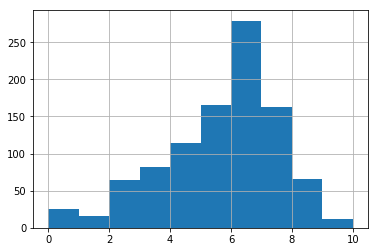

In [955]:
df_08['greenhouse_gas_score'].hist();

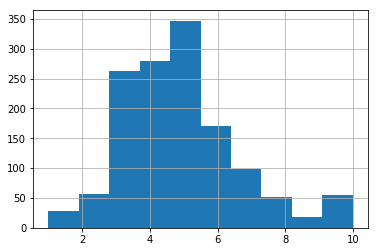

In [956]:
df_18['greenhouse_gas_score'].hist();

### How has the distribution of combined mpg changed from 2008 to 2018?

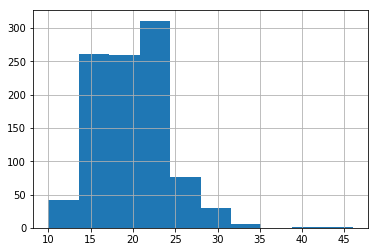

In [957]:
df_08['cmb_mpg'].hist();

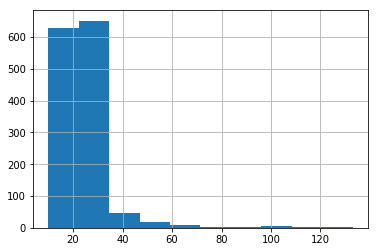

In [958]:
df_18['cmb_mpg'].hist();

### Correlation between displacement and combined mpg

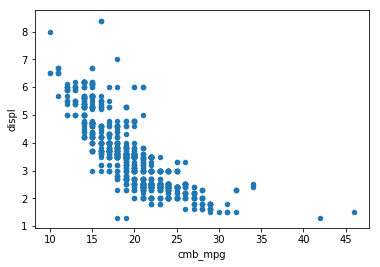

In [959]:
df_08.plot(x='cmb_mpg', y='displ', kind='scatter');

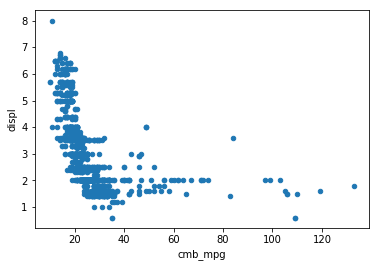

In [960]:
df_18.plot(x='cmb_mpg',y='displ',kind='scatter');

### Correlation between greenhouse gas score and combined mpg.

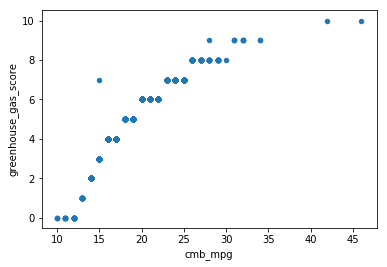

In [961]:
df_08.plot(x='cmb_mpg',y='greenhouse_gas_score',kind='scatter');

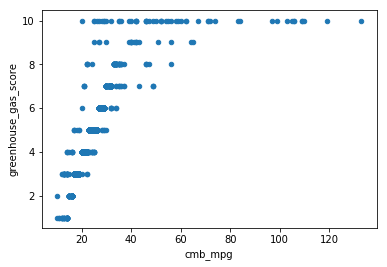

In [962]:
df_18.plot(x='cmb_mpg',y='greenhouse_gas_score',kind='scatter');

<a id='conclusions'></a>
## Drawing Conclusions

### Q1: Are more unique models using alternative sources of fuel? By how much?

Let's first look at what the sources of fuel are and which ones are alternative sources.

In [963]:
df_08.fuel.value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [964]:
df_18.fuel.value_counts()

Gasoline       1214
Gas              41
Ethanol          41
Diesel           37
Electricity      35
Name: fuel, dtype: int64

In [965]:
# How many unique models used alternative sources of fuel in 2008
alt_08 = df_08.query('fuel in ["ethanol", "CNG"]').model.nunique()
alt_08

2

In [966]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

52

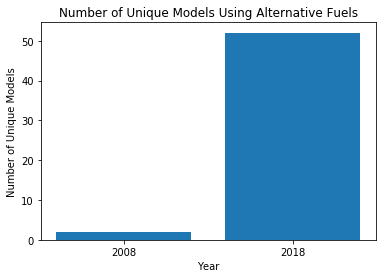

In [967]:
plt.bar(["2008","2018"],[alt_08,alt_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel('Number of Unique Models');

Since 2008, the number of unique models using alternative sources of fuel increased by 50. We can also look at proportions.

In [968]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 607)

In [969]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.085667215815486)

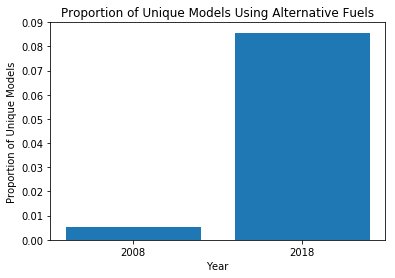

In [970]:
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

### Q2: How much have vehicle classes improved in fuel economy?  

Let's look at the average fuel economy for each vehicle class for both years.

In [971]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [972]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          24.482759
midsize car        30.188940
minivan            28.200000
pickup             18.349206
small SUV          24.356223
small car          25.766827
special purpose    19.937500
standard SUV       19.405405
station wagon      30.054545
van                16.000000
Name: cmb_mpg, dtype: float64

In [973]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          5.973668
midsize car        8.587491
minivan            9.082353
pickup             2.072098
small SUV               NaN
small car          4.661722
special purpose         NaN
standard SUV            NaN
station wagon      7.687879
van                1.047619
Name: cmb_mpg, dtype: float64

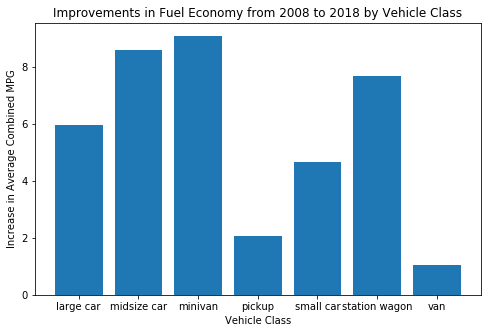

In [974]:
# only plot the classes that exist in both years
inc.dropna(inplace = True)
plt.subplots(figsize=(8,5))
plt.bar(inc.index,inc)
plt.title("Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Increase in Average Combined MPG");

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

We can analyze this by filtering each dataframe by SmartWay classification and exploring these datasets.

In [975]:
# Check to see how many SmartWay labels in 2008 dataset
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [976]:
# get all smartway vehicles in 2008
smart_08 = df_08.query('smartway == "yes"')

In [977]:
# explore smartway vehicles in 2008
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [978]:
# Check to see how many SmartWay labels in 2018 dataset
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [979]:
# get all smartway vehicles in 2008
smart_18 = df_18.query('smartway in ["Yes", "Elite"]')

In [980]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,1.896759,4.162037,5.259259,38.291667,43.541667,40.231481,8.143519
std,0.625161,0.923413,1.826779,21.324582,17.176732,19.306635,1.217223
min,0.600000,2.000000,3.000000,19.000000,23.000000,21.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,35.000000,31.000000,7.000000
50%,1.800000,4.000000,6.000000,30.000000,38.000000,33.000000,8.000000
75%,2.000000,4.000000,7.000000,40.000000,43.000000,42.000000,9.000000
max,4.000000,8.000000,8.000000,145.000000,121.000000,133.000000,10.000000


### Q4: What features are associated with better fuel economy?

To answer this question, I am going to filter all vehicles that have top 50% fuel economy ratings, then explore the properties of this dataframes.

In [981]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [982]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,1.983547,4.095064,4.941499,29.692870,36.652651,32.297989,6.528336
std,0.496124,0.636291,1.884061,15.222068,12.311881,13.839638,1.563263
min,0.600000,2.000000,1.000000,21.000000,26.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,29.000000,37.000000,32.000000,7.000000
max,4.000000,8.000000,8.000000,145.000000,121.000000,133.000000,10.000000
